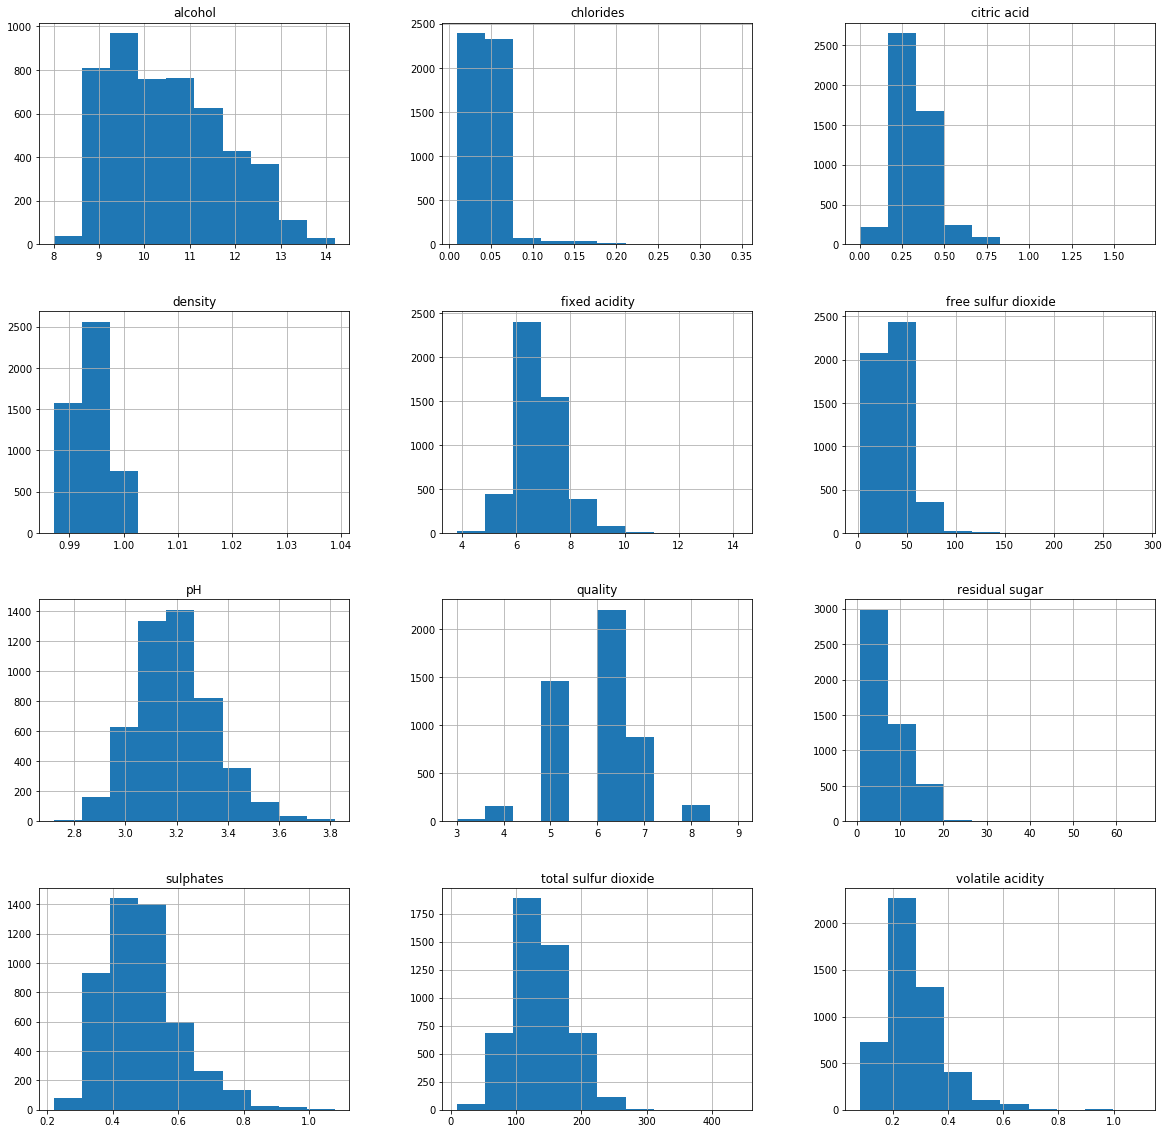

In [1]:
import pandas as pd
import numpy as np
result = pd.read_csv('E:\\nam4\\doan\\svmc\\winequality-white.csv',sep=';')
# print("result:\n {}".format(result.head()))
# result.describe()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

result.hist(bins=10, figsize=(20,20))
plt.show()

In [2]:
count=result.shape[0]
print(count)
size=int((0.3*count))
print(size)
training=result.iloc[0:size,:].reset_index(drop=True)
test=result.iloc[size:count,:].reset_index(drop=True)

X=np.array(training.iloc[:,:-1])
y=np.array(training.iloc[:,-1:])
X_test=np.array(test.iloc[:,:-1])
y_test=np.array(test.iloc[:,-1:])
print(X)
print(y)


4898
1469
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.9   0.19  0.49 ...  3.2   0.27 11.5 ]
 [ 7.1   0.25  0.49 ...  3.13  0.39 12.3 ]
 [ 6.5   0.24  0.24 ...  3.19  0.39  9.8 ]]
[[6]
 [6]
 [6]
 ...
 [6]
 [7]
 [5]]


In [3]:
#Buiding Xbar
one = np.ones((X.shape[0],1))
Xbar=np.concatenate((one,X),axis=1)

# print(Xbar)
A=np.dot(Xbar.T,Xbar)
# print(A)
B=np.dot(Xbar.T,y)
# print(B)
w=np.dot(np.linalg.pinv(A),B)
print(w)


#model LR
from sklearn import datasets, linear_model
regr=linear_model.LinearRegression(fit_intercept=False )
regr.fit(Xbar,y)
print("w la:",regr.coef_)

[[ 2.86855271e+02]
 [ 2.10690153e-01]
 [-1.68976251e+00]
 [-7.59449772e-02]
 [ 1.14341520e-01]
 [-1.09175514e+00]
 [ 7.31493048e-03]
 [-3.51510357e-04]
 [-2.90347351e+02]
 [ 1.56110292e+00]
 [ 1.01633469e+00]
 [ 4.10247842e-02]]
w la: [[ 2.86855315e+02  2.10690188e-01 -1.68976250e+00 -7.59449695e-02
   1.14341536e-01 -1.09175496e+00  7.31493019e-03 -3.51510178e-04
  -2.90347396e+02  1.56110307e+00  1.01633476e+00  4.10247342e-02]]


In [4]:
#predict test
one_test=np.ones((X_test.shape[0],1))
# print(one_test)
Xbar_test=np.concatenate((one_test,X_test),axis=1)
# print(Xbar_test)
y_prd_test=np.dot(w.T,Xbar_test.T)
print(y_prd_test)
print(y_test.T)

[[4.98587542 5.96437581 6.08074145 ... 5.41714756 6.77252755 6.55776388]]
[[5 7 6 ... 6 7 6]]


In [16]:
#loss function on test
cost=0
num=0
print(y_test.shape)
print(y_prd_test.shape)
for x, t in zip(y_test.T, y_prd_test):
    print('Outcome:', x, 'Predict:', t)
    cost += pow(x[0] - t[0], 2)
    num+=1
L=cost/num
print("loss tap test=",L)

(3429, 1)
(1, 3429)
Outcome: [5 7 6 ... 6 7 6] Predict: [4.98587542 5.96437581 6.08074145 ... 5.41714756 6.77252755 6.55776388]
loss tap test= 0.00019950368231963896


In [6]:
#loss function on train

y_prd_training=np.dot(w.T,Xbar.T)
cost=0
num=0
for x, x1 in zip(y, y_prd_training):
        print('Outcome:', x[0], 'Predict:', x1[0])
        cost += pow(x[0] - x1[0], 2)
        num+=1
L=cost/(num)
print("loss tap training=",L)

Outcome: 6 Predict: 5.297660815379511
loss tap training= 0.49328033025337326


In [40]:
#GD function
lr=0.1
stop= 0.01
num_iter= 10
w_gd=[]

def grad_f(w):
    k=np.dot(Xbar,w)
    k0=np.subtract(k,y)
    k1=np.dot(Xbar.T,k0)
    return k1


def training(lr):
#     khoi tao gia tri w
    w_gd.append(np.random.normal(size=(12,1)))
#     tinh dao ham tai diem khoi tao
    y_gd = grad_f(w_gd[0])
#     vong lap cap nhat theo gradient
    
    for i in range(num_iter):
#         cap nhat w
        new_w=w_gd[-1]-lr*y_gd
        w_gd.append(new_w)
#         cap nhat gia tri gradient
        y_gd_next= grad_f(new_w)
#         diem dung
        if(np.linalg.norm(y_gd - y_gd_next)/len(w_gd[-1]) < stop):
            print("stopped")
            return
        y_gd= y_gd_next
    print("w: ",w_gd)
if __name__ == '__main__':
    training(lr)

w:  [array([[ 0.38187781],
       [ 0.54578524],
       [-0.63210139],
       [ 0.20025661],
       [-0.87958776],
       [-0.12799723],
       [ 0.70424793],
       [ 0.17625368],
       [-1.14414579],
       [-0.46494784],
       [ 1.66800001],
       [-2.94505807]]), array([[-1.59885119e+03],
       [-1.10874710e+04],
       [-4.38986239e+02],
       [-5.99155310e+02],
       [-1.40974339e+04],
       [-8.98315943e+01],
       [-9.50483734e+04],
       [-3.28109117e+05],
       [-1.59458174e+03],
       [-5.09355619e+03],
       [-8.08949361e+02],
       [-1.50081719e+04]]), array([[7.47940576e+09],
       [5.21653106e+10],
       [2.12382905e+09],
       [2.65066098e+09],
       [5.10511227e+10],
       [3.60044734e+08],
       [2.89662036e+11],
       [1.17971881e+12],
       [7.44077108e+09],
       [2.39543418e+10],
       [3.70179240e+09],
       [7.57309084e+10]]), array([[-2.66726515e+16],
       [-1.86037993e+17],
       [-7.57563610e+15],
       [-9.45124306e+15],
       [-